In [1]:
%matplotlib inline

In [2]:
#Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#Load in csv
cardata_df = pd.read_csv("../Robert/clean_car_data.csv")
cardata_df.head()

,Unnamed: 0,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,2020 Census Tract
0,1,5YJXCBE27J,Island,Greenbank,WA,98253,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,10.0,326880081,(-122.575569 48.08489),5.302997e+10
1,8,1N4BZ0CP8H,Chelan,Wenatchee,WA,98801,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,12.0,192768747,(-120.336499 47.425146),5.300796e+10
2,10,WVWKR7AU3K,Snohomish,Edmonds,WA,98026,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125,32.0,477565112,(-122.333046 47.829439),5.306105e+10
3,11,5YJ3E1EB0J,Island,Clinton,WA,98236,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,10.0,476402678,(-122.35803 47.9796),5.302997e+10
4,13,5YJ3E1EBXL,Snohomish,Brier,WA,98036,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,1.0,103288153,(-122.281856 47.811678),5.306105e+10


In [4]:
#Filtering only data to only hybrid/electric cars

##cars_df = pd.DataFrame(cardata_df.loc[cardata_df['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)'])
##cars_df.head()

In [7]:
#Filtering only the data needed
cars_only_df = cardata_df[["County","Electric Vehicle Type"]]


In [8]:
#Grouping electric cars by county
county_cars = cars_only_df.groupby('County', as_index=False)
county_cars.head()

,County,Electric Vehicle Type
0,Island,Battery Electric Vehicle (BEV)
1,Chelan,Battery Electric Vehicle (BEV)
2,Snohomish,Battery Electric Vehicle (BEV)
3,Island,Battery Electric Vehicle (BEV)
4,Snohomish,Battery Electric Vehicle (BEV)
...,...,...
33973,Garfield,Plug-in Hybrid Electric Vehicle (PHEV)
40539,Lincoln,Plug-in Hybrid Electric Vehicle (PHEV)
50780,Garfield,Plug-in Hybrid Electric Vehicle (PHEV)
64715,Garfield,Battery Electric Vehicle (BEV)


In [10]:
#Count of electric cars per county
cars_per_county = county_cars['Electric Vehicle Type'].count()


In [20]:
#Get total number of electric vehicles 
total_vehicles = cardata_df[['Electric Vehicle Type']].count()

In [16]:
#Finding data less than 1%
#pct_data = cars_per_county['percent'] = (cars_per_county['Electric Vehicle Type'] / (total_vehicles).sum()) * 100

In [37]:
#Convert Series to DataFrame
#ec_county_df = pd.DataFrame(cars_per_county)
#print(ec_county_df)
max_cardata_df = cars_per_county.sort_values(by=['Electric Vehicle Type'], ascending = False)
max_cardata_df.head(10)

,County,Electric Vehicle Type,percent
16,King,57360,52.557794
30,Snohomish,12018,11.011847
26,Pierce,8211,7.523571
5,Clark,6450,5.910003
33,Thurston,4035,3.697188
17,Kitsap,3770,3.454374
36,Whatcom,2763,2.531680
31,Spokane,2717,2.489532
2,Benton,1329,1.217736
14,Island,1280,1.172838


In [36]:
min_cardata_df = cars_per_county.sort_values(by=['Electric Vehicle Type'], ascending = True)
min_cardata_df.head(10)

,County,Electric Vehicle Type,percent
11,Garfield,4,0.003665
6,Columbia,13,0.011912
9,Ferry,27,0.024740
21,Lincoln,28,0.025656
25,Pend Oreille,31,0.028405
0,Adams,35,0.032070
34,Wahkiakum,37,0.033902
1,Asotin,45,0.041233
29,Skamania,134,0.122781
32,Stevens,140,0.128279


In [26]:
vehicle_count = ec_county_df['Electric Vehicle Type'].tolist()
print(vehicle_count)
county_list = ec_county_df['County'].tolist()
print(county_list)

[23, 27, 864, 503, 452, 4571, 12, 382, 159, 23, 242, 1, 214, 230, 895, 467, 45526, 2667, 290, 115, 260, 12, 352, 100, 70, 19, 5784, 552, 889, 83, 9426, 1831, 85, 2752, 25, 193, 1987, 108, 391]
['Adams', 'Asotin', 'Benton', 'Chelan', 'Clallam', 'Clark', 'Columbia', 'Cowlitz', 'Douglas', 'Ferry', 'Franklin', 'Garfield', 'Grant', 'Grays Harbor', 'Island', 'Jefferson', 'King', 'Kitsap', 'Kittitas', 'Klickitat', 'Lewis', 'Lincoln', 'Mason', 'Okanogan', 'Pacific', 'Pend Oreille', 'Pierce', 'San Juan', 'Skagit', 'Skamania', 'Snohomish', 'Spokane', 'Stevens', 'Thurston', 'Wahkiakum', 'Walla Walla', 'Whatcom', 'Whitman', 'Yakima']


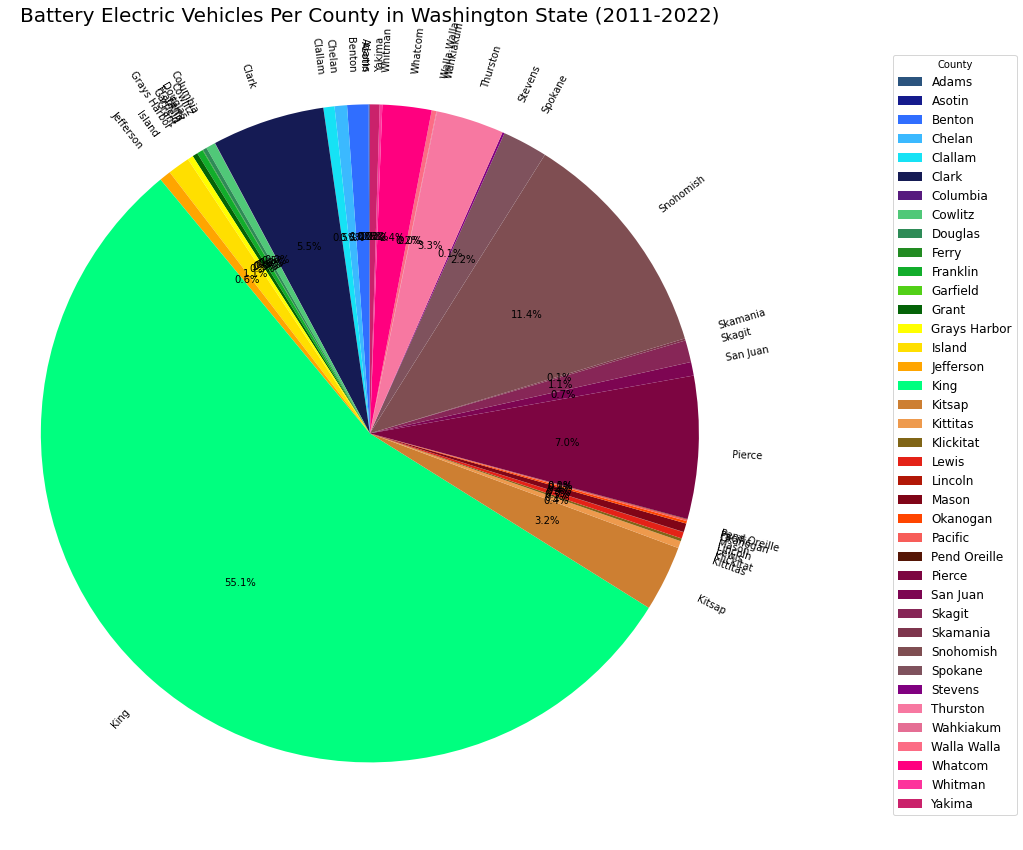

In [109]:
sizes = vehicle_count
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
colors = ['#2B547E',
'#151B8D',
'#306EFF',
'#3BB9FF',
'#16E2F5',
'#151B54',
'#571B7E',
'#50C878',
'#2E8B57',
'#228B22',
'#12AD2B',
'#52D017',
'#046307',
'#FFFF00',
'#FFDF00',
'#FFA500',
'#00FF7F',
'#CD7F32',
'#EE9A4D',
'#806517',
'#E42217',
'#B21807',
'#800517',
'#FF4500',
'#F75D59',
'#551606',
'#7D0541',
'#7D0552',
'#872657',
'#7E354D',
'#7F4E52',
'#7F525D',
'#800080',
'#F778A1',
'#E56E94',
'#FC6C85',
'#FF007F',
'#FD349C',
'#CA226B']
plt.pie(sizes, explode=explode, labels = county_list,colors=colors, autopct='%.1f%%',rotatelabels=True, startangle=90,)

plt.title("Battery Electric Vehicles Per County in Washington State (2011-2022)",fontsize=20)
plt.legend(loc='right',bbox_to_anchor=(1.4,0.5),title = "County",fontsize=12)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(13,15)
fig.set_facecolor('white')
plt.savefig('BEV_per_County', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
#Removing King County from the dataset to compare all other counties
no_king_df = ec_county_df.drop([16])
no_king_df.head()

,County,Electric Vehicle Type
0,Adams,23
1,Asotin,27
2,Benton,864
3,Chelan,503
4,Clallam,452


In [34]:
no_king_count = no_king_df['Electric Vehicle Type'].tolist()
print(no_king_count)
no_king_list = no_king_df['County'].tolist()
print(no_king_list)

[23, 27, 864, 503, 452, 4571, 12, 382, 159, 23, 242, 1, 214, 230, 895, 467, 2667, 290, 115, 260, 12, 352, 100, 70, 19, 5784, 552, 889, 83, 9426, 1831, 85, 2752, 25, 193, 1987, 108, 391]
['Adams', 'Asotin', 'Benton', 'Chelan', 'Clallam', 'Clark', 'Columbia', 'Cowlitz', 'Douglas', 'Ferry', 'Franklin', 'Garfield', 'Grant', 'Grays Harbor', 'Island', 'Jefferson', 'Kitsap', 'Kittitas', 'Klickitat', 'Lewis', 'Lincoln', 'Mason', 'Okanogan', 'Pacific', 'Pend Oreille', 'Pierce', 'San Juan', 'Skagit', 'Skamania', 'Snohomish', 'Spokane', 'Stevens', 'Thurston', 'Wahkiakum', 'Walla Walla', 'Whatcom', 'Whitman', 'Yakima']


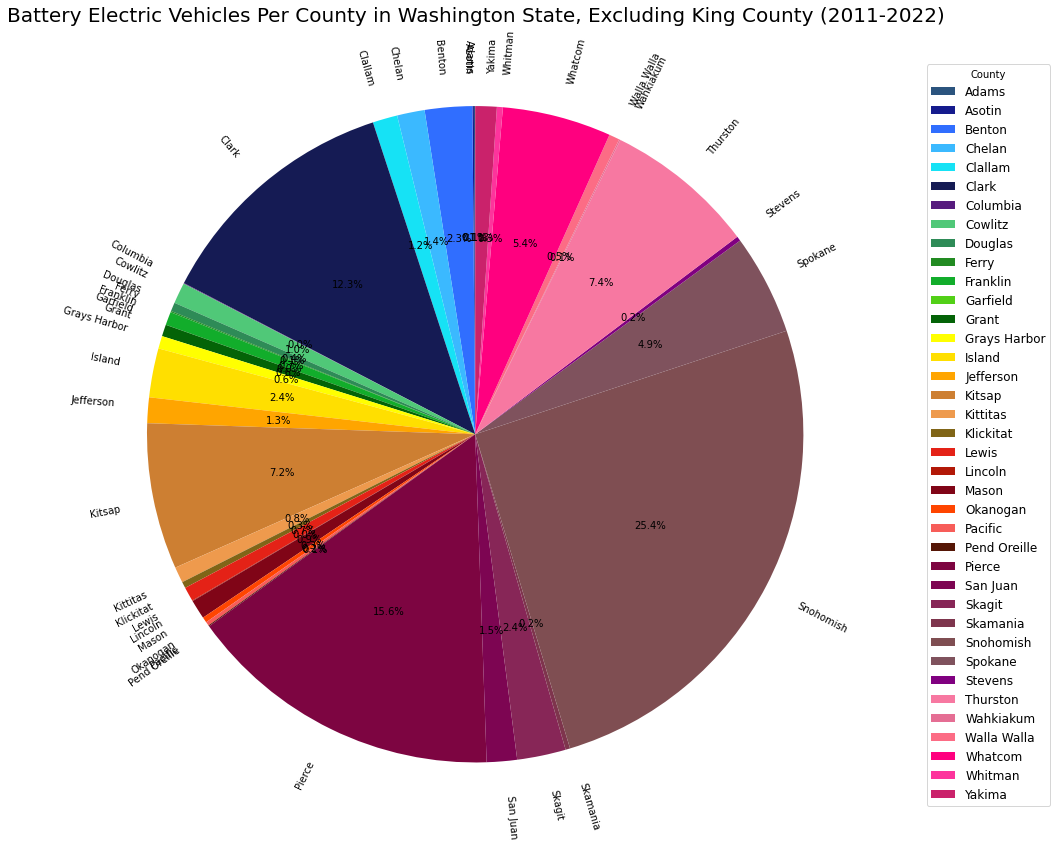

In [110]:
sizes = no_king_count
labels= no_king_list

explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
colors = ['#2B547E',
'#151B8D',
'#306EFF',
'#3BB9FF',
'#16E2F5',
'#151B54',
'#571B7E',
'#50C878',
'#2E8B57',
'#228B22',
'#12AD2B',
'#52D017',
'#046307',
'#FFFF00',
'#FFDF00',
'#FFA500',
'#CD7F32',
'#EE9A4D',
'#806517',
'#E42217',
'#B21807',
'#800517',
'#FF4500',
'#F75D59',
'#551606',
'#7D0541',
'#7D0552',
'#872657',
'#7E354D',
'#7F4E52',
'#7F525D',
'#800080',
'#F778A1',
'#E56E94',
'#FC6C85',
'#FF007F',
'#FD349C',
'#CA226B']
plt.pie(sizes, explode=explode, labels = labels,colors=colors, autopct='%.1f%%',rotatelabels=True, startangle=90,)

plt.title("Battery Electric Vehicles Per County in Washington State, Excluding King County (2011-2022)", fontsize=20)

plt.legend(loc='right',bbox_to_anchor=(1.3,0.5),title = "County",fontsize=12)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(13,15)
fig.set_facecolor('white')
plt.tight_layout
plt.savefig('BEV_per_County_Excl_King', dpi=300, bbox_inches='tight')
plt.show() 

In [83]:
#Examining counties making up more than 1% of the WA state's BEV
more_than_one_df = ec_county_df.drop([0,1,3,4,6,7,8,9,10,11,12,13,15,18,19,20,21,22,23,24,25,27,29,32,34,35,37,38])
more_than_one_df.head()

,County,Electric Vehicle Type,percent
2,Benton,864,1.046233
5,Clark,4571,5.535105
14,Island,895,1.083771
16,King,45526,55.128236
17,Kitsap,2667,3.229517


In [85]:
more_count = more_than_one_df['Electric Vehicle Type'].tolist()
print(more_count)
more_list = more_than_one_df['County'].tolist()
print(more_list)

[864, 4571, 895, 45526, 2667, 5784, 889, 9426, 1831, 2752, 1987]
['Benton', 'Clark', 'Island', 'King', 'Kitsap', 'Pierce', 'Skagit', 'Snohomish', 'Spokane', 'Thurston', 'Whatcom']


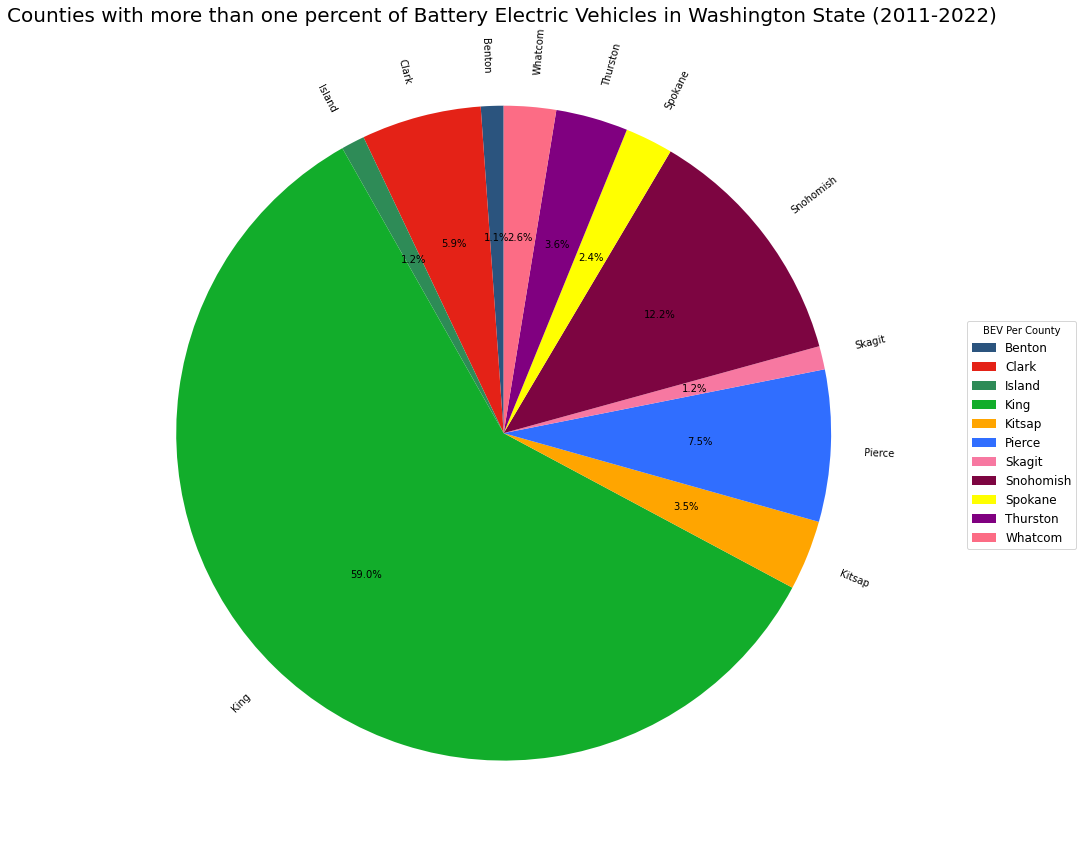

In [111]:
#Pie Chart more than 1%
sizes = more_count
labels= more_list

explode = [0,0,0,0,0,0,0,0,0,0,0,]
colors = ['#2B547E','#E42217','#2E8B57','#12AD2B','#FFA500','#306EFF','#F778A1','#7D0541','#FFFF00','#800080','#FC6C85']
plt.pie(sizes, explode=explode, labels = labels,colors=colors, autopct='%.1f%%',rotatelabels=True, startangle=90,)

plt.title("Counties with more than one percent of Battery Electric Vehicles in Washington State (2011-2022)", fontsize=20)

plt.legend(loc='right',bbox_to_anchor=(1.3,0.5),title = "BEV Per County",fontsize=12)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(13,15)
fig.set_facecolor('white')
plt.tight_layout
plt.savefig('BEV_More_Than_One.png', dpi=300, bbox_inches='tight')
plt.show()

In [84]:
#Examining counties making up less than 1% of the WA state's BEV
less_than_one_df = ec_county_df.drop([2,5,14,16,17,26,28,30,31,33,36])
less_than_one_df.head()

,County,Electric Vehicle Type,percent
0,Adams,23,0.027851
1,Asotin,27,0.032695
3,Chelan,503,0.609092
4,Clallam,452,0.547335
6,Columbia,12,0.014531


In [86]:
less_count = less_than_one_df['Electric Vehicle Type'].tolist()
print(less_count)
less_list = less_than_one_df['County'].tolist()
print(less_list)

[23, 27, 503, 452, 12, 382, 159, 23, 242, 1, 214, 230, 467, 290, 115, 260, 12, 352, 100, 70, 19, 552, 83, 85, 25, 193, 108, 391]
['Adams', 'Asotin', 'Chelan', 'Clallam', 'Columbia', 'Cowlitz', 'Douglas', 'Ferry', 'Franklin', 'Garfield', 'Grant', 'Grays Harbor', 'Jefferson', 'Kittitas', 'Klickitat', 'Lewis', 'Lincoln', 'Mason', 'Okanogan', 'Pacific', 'Pend Oreille', 'San Juan', 'Skamania', 'Stevens', 'Wahkiakum', 'Walla Walla', 'Whitman', 'Yakima']


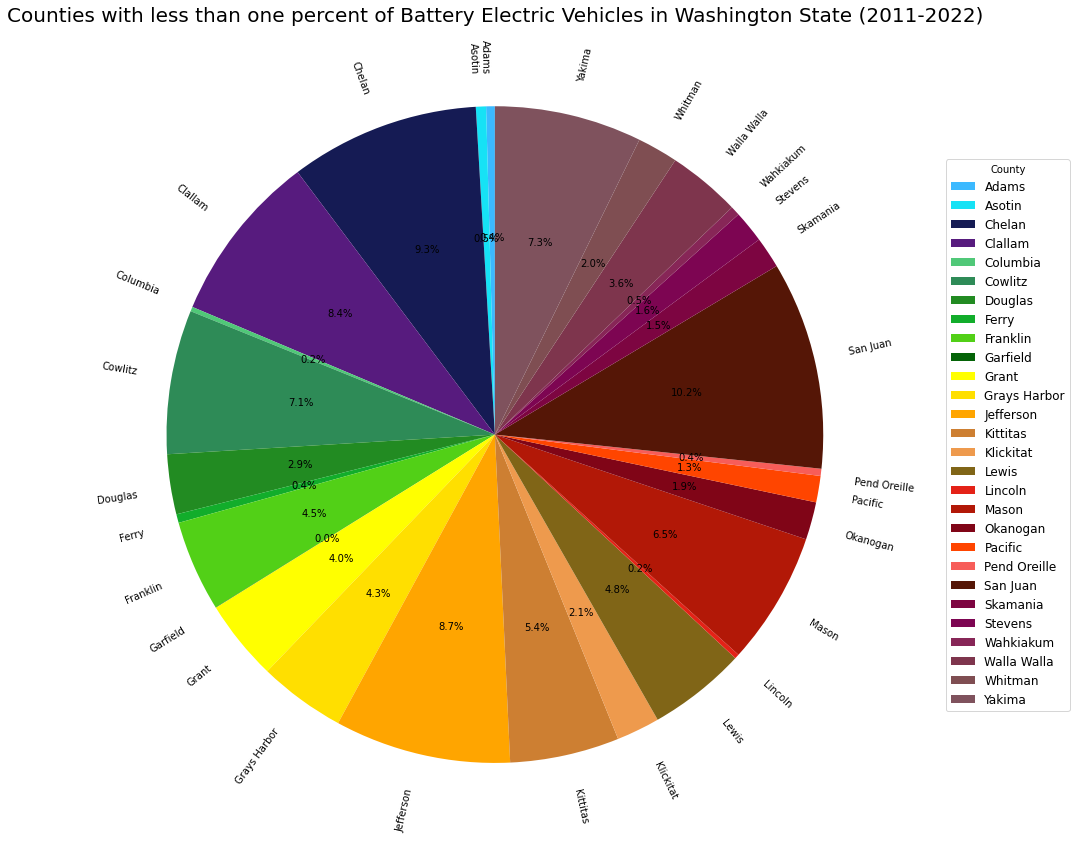

In [112]:
#Pie Chart less than 1%
sizes = less_count
labels= less_list

explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
colors = ['#3BB9FF',
'#16E2F5',
'#151B54',
'#571B7E',
'#50C878',
'#2E8B57',
'#228B22',
'#12AD2B',
'#52D017',
'#046307',
'#FFFF00',
'#FFDF00',
'#FFA500',
'#CD7F32',
'#EE9A4D',
'#806517',
'#E42217',
'#B21807',
'#800517',
'#FF4500',
'#F75D59',
'#551606',
'#7D0541',
'#7D0552',
'#872657',
'#7E354D',
'#7F4E52',
'#7F525D']
plt.pie(sizes, explode=explode, labels = labels,colors=colors, autopct='%.1f%%',rotatelabels=True, startangle=90,)

plt.title("Counties with less than one percent of Battery Electric Vehicles in Washington State (2011-2022)", fontsize=20)

plt.legend(loc='right',bbox_to_anchor=(1.3,0.5),title = "County",fontsize=12)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(13,15)
fig.set_facecolor('white')
plt.tight_layout
plt.savefig('BEV_Less_Than_One.png', dpi=300, bbox_inches='tight')
plt.show()